Денис, рад приветствовать тебя)

Меня зовут Александр Дьяченко и этот проект у тебя буду проверять я.  
Предлагаю общаться на "ты", если это для тебя приемлемо)  

В твоей работе я оставлю некоторые комментарии, которые помогут лучше понять материал или скажу, что все сделано верно.  
Давай договоримся об условных обозначениях, чтобы наше общение было эффективнее:  

Комментарии будут в <font color='green'>зеленой ✔️</font>, <font color='orange'>оранжевой ⚠️</font> или <font color='red'>красной ❌</font> рамках:


<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Успех ✔️</b>
       
Зеленым цветом помечены образцовые решения. Которые можно использовать в дальнейшем.
    
</div>

<div class="alert alert-block alert-warning"; style="border-left: 6px solid orange">
<b>Рекомендация ⚠️</b>
       
Желтым цветом отмечено то, что ты можешь улучшить или доработать. Можешь учесть это при выполнении следующих работ или доработать проект сейчас, но это не обязательно.
    
</div>

<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Ошибка ❌</b>
       
Красным цветом помечены моменты, которые необходимо доработать, чтобы проект был принят. Уверен, что у тебя все получится. Буду ждать твою работу на повторное ревью.
    
</div>

-------------------

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Свои комментарии и вопросы ты можешь оставлять в синей рамочке. Также используй её, если что-то исправил, доделал или полностью переписал.</div>




Старайся отвечать на мои рекомендации и не удалять комментарии, так получится проверить работу быстрее)

Погнали!



-------

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

### Подключение библиотек и модулей

In [1]:
# ячейка для подключения модулей python  и настроек отображения
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statistics import mode
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from lightgbm import LGBMRegressor
from time import time

pd.set_option("display.max_columns", None)

# Константа псевдослучайности для алгоритмов обучения
RANDOM = 1111

### Загрузка данных

Данные загружаются из файла формата CSV.

In [2]:
# чтение файла CSV, в качестве разделителя использован символ табуляции
autos = pd.read_csv('/datasets/autos.csv')
# вывод на экран первых 5 строк считанного файла
display(autos.head())
# вывод сводной информации о таблице
display(autos.info())
# вывод основных статистик
display(autos.describe())

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

None

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Данные из файла считались, таблица содержит 354369 записей по 16 признакам.

Названия признаков и их расшифровка:

- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- NotRepaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя

Целевой признак:
- Price — цена (евро)

В данных наблюдаются пропуски. В таблице данные предоставлены следующими типами: int, object.

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Успех ✔️</b>
       
Данные на базе, идем дальше)
    
</div>

### Предобработка данных

Сохраним количество объектов в переменной autos_count.

In [3]:
autos_count = autos.shape[0]

#### Признак DateCrawled.
Признак DateCrawled сам по себе не несёт полезной информации, удалим его.

In [4]:
autos.drop(['DateCrawled'], axis=1, inplace=True)

#### Признаки DateCreated, LastSeen.
Признаки дат приведём к формату datetime и выделим отдельные категориальные признаки: год, месяц, число.

In [5]:
for column in ('DateCreated', 'LastSeen'):
    autos[column] = pd.to_datetime(autos[column], format='%Y-%m-%d %H:%M:%S')
    autos[column + '_year'] = pd.DatetimeIndex(autos[column]).year
    autos[column + '_month'] = pd.DatetimeIndex(autos[column]).month                                           
    autos[column + '_day'] = pd.DatetimeIndex(autos[column]).day
    autos.drop([column], axis=1, inplace=True)

#### Признаки VehicleType.
Тип автомобильного кузова.

In [6]:
print('Доля пропусков в признаке VehicleType:', autos['VehicleType'].isna().sum()/autos.shape[0])
print('Уникальные значения признака VehicleType:', autos['VehicleType'].unique())

Доля пропусков в признаке VehicleType: 0.1057936783409384
Уникальные значения признака VehicleType: [nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']


Так как определить тип кузова возможности нет, создадим отдельную категорию "no data". Пропущенные значения нельзя определить как "other", по причине того, что иной тип кузова исключает определённые, а пропущеные могут совпадать.

In [7]:
autos['VehicleType'] = autos['VehicleType'].fillna('no data')

#### Признак RegistrationYear.
Год регистрации автомобиля.

In [8]:
print('Уникальные значения признака RegistrationYear:', autos['RegistrationYear'].sort_values().unique())

Уникальные значения признака RegistrationYear: [1000 1001 1039 1111 1200 1234 1253 1255 1300 1400 1500 1600 1602 1688
 1800 1910 1915 1919 1920 1923 1925 1927 1928 1929 1930 1931 1932 1933
 1934 1935 1936 1937 1938 1940 1941 1942 1943 1944 1945 1946 1947 1948
 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962
 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976
 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2066 2200 2222 2290 2500 2800 2900 3000 3200 3500 3700 3800 4000
 4100 4500 4800 5000 5300 5555 5600 5900 5911 6000 6500 7000 7100 7500
 7800 8000 8200 8455 8500 8888 9000 9229 9450 9996 9999]


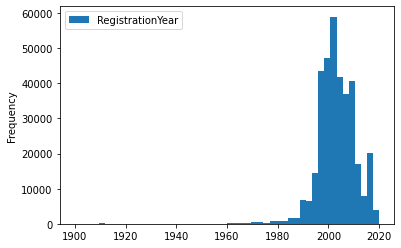

In [9]:
autos.plot(y='RegistrationYear', kind='hist', bins=50, range=(1900, 2020))
plt.show()

In [10]:
print('Количество автомобилей со значением года регистрации вне диапазона 1940 - 2020 года:',
      autos.shape[0] - autos.query('1940 <= RegistrationYear <= 2020')['VehicleType'].count())

Количество автомобилей со значением года регистрации вне диапазона 1940 - 2020 года: 327


Удалим автомобили с данными регистрации вне диапазона 1940 - 2020 года, так как их доля в датасете незначительна.

In [11]:
autos = autos.query('1940 <= RegistrationYear <= DateCreated_year')


<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Ошибка ❌</b>
       
У нас нет уверенности, что данные выгружены в 2020 году. Подсказать актуальную верхнюю границу года для этих данных нам может признак "дата создания анкеты"
    
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Спасибо за подсказку, изменил верхнюю границу с "2020" на значение из колонки "DateCreated_year".</div>

#### Признак Gearbox.
Тип коробки передач.

In [12]:
print('Доля пропусков в признаке Gearbox:', autos['Gearbox'].isna().sum()/autos.shape[0])
print('Уникальные значения признака Gearbox:', autos['Gearbox'].unique())

Доля пропусков в признаке Gearbox: 0.052464982612766733
Уникальные значения признака Gearbox: ['manual' 'auto' nan]


Так как определить тип кузова возможности нет, создадим отдельную категорию "no data".

In [13]:
autos['Gearbox'] = autos['Gearbox'].fillna('no data')

/tmp/ipykernel_48/2898498920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos['Gearbox'] = autos['Gearbox'].fillna('no data')


#### Признак Brand.
Марка автомобиля.

In [14]:
print('Уникальные значения признака Brand:', autos['Brand'].unique())

Уникальные значения признака Brand: ['volkswagen' 'audi' 'jeep' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda'
 'nissan' 'renault' 'mercedes_benz' 'seat' 'honda' 'fiat' 'opel' 'mini'
 'smart' 'hyundai' 'sonstige_autos' 'alfa_romeo' 'subaru' 'volvo'
 'mitsubishi' 'kia' 'suzuki' 'lancia' 'citroen' 'toyota' 'chevrolet'
 'dacia' 'daihatsu' 'trabant' 'saab' 'chrysler' 'jaguar' 'daewoo'
 'porsche' 'rover' 'land_rover' 'lada']


Признак марки автомобиля не нуждается в предобработке.

#### Признак Model.
Марка автомобиля.

In [15]:
print('Доля пропусков в признаке Model:', autos['Model'].isna().sum()/autos.shape[0])
print('Уникальные значения признака Model:', autos['Model'].sort_values().unique())

Доля пропусков в признаке Model: 0.051658191433291034
Уникальные значения признака Model: ['100' '145' '147' '156' '159' '1_reihe' '1er' '200' '2_reihe' '300c'
 '3_reihe' '3er' '4_reihe' '500' '5_reihe' '5er' '601' '6_reihe' '6er'
 '7er' '80' '850' '90' '900' '9000' '911' 'a1' 'a2' 'a3' 'a4' 'a5' 'a6'
 'a8' 'a_klasse' 'accord' 'agila' 'alhambra' 'almera' 'altea' 'amarok'
 'antara' 'arosa' 'astra' 'auris' 'avensis' 'aveo' 'aygo' 'b_klasse'
 'b_max' 'beetle' 'berlingo' 'bora' 'boxster' 'bravo' 'c1' 'c2' 'c3' 'c4'
 'c5' 'c_klasse' 'c_max' 'c_reihe' 'caddy' 'calibra' 'captiva' 'carisma'
 'carnival' 'cayenne' 'cc' 'ceed' 'charade' 'cherokee' 'citigo' 'civic'
 'cl' 'clio' 'clk' 'clubman' 'colt' 'combo' 'cooper' 'cordoba' 'corolla'
 'corsa' 'cr_reihe' 'croma' 'crossfire' 'cuore' 'cx_reihe' 'defender'
 'delta' 'discovery' 'doblo' 'ducato' 'duster' 'e_klasse' 'elefantino'
 'eos' 'escort' 'espace' 'exeo' 'fabia' 'fiesta' 'focus' 'forester'
 'forfour' 'fortwo' 'fox' 'freelander' 'fusion' 'g_klass

Доля пропусков в признаке составляет 5,5%, заменим пропуски модами по брендам.

In [16]:
autos['Model'] = autos['Model'].fillna(autos.groupby('Brand')['Model'].transform(mode))

/tmp/ipykernel_48/3047979875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos['Model'] = autos['Model'].fillna(autos.groupby('Brand')['Model'].transform(mode))


In [17]:
print('Доля пропусков в признаке Model:', autos['Model'].isna().sum()/autos.shape[0])

Доля пропусков в признаке Model: 0.009257487110480335


Не все пропуски заполнились, какая то из категорий признака брэнд не облодала модой для заполнения. Определим её по группировке.

In [18]:
autos.groupby('Brand')['Model'].count()

Brand
alfa_romeo         2232
audi              28472
bmw               35792
chevrolet          1702
chrysler           1393
citroen            4910
dacia               874
daewoo              513
daihatsu            780
fiat               9154
ford              24154
honda              2688
hyundai            3446
jaguar              500
jeep                651
kia                2364
lada                218
lancia              448
land_rover          537
mazda              5397
mercedes_benz     30999
mini               3094
mitsubishi         2909
nissan             4747
opel              37983
peugeot           10620
porsche             747
renault           16925
rover               459
saab                514
seat               6535
skoda              5358
smart              5029
sonstige_autos        0
subaru              740
suzuki             2249
toyota             4459
trabant             570
volkswagen        73169
volvo              3142
Name: Model, dtype: int64

Категория sonstige_autos признака брэнд не содержит ни одного значения модели. Назначим всем автомобилям sonstige_autos модель "no data".

In [19]:
autos['Model'] = autos['Model'].fillna('no data')

/tmp/ipykernel_48/3319108347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos['Model'] = autos['Model'].fillna('no data')


In [20]:
print('Доля пропусков в признаке Model:', autos['Model'].isna().sum()/autos.shape[0])

Доля пропусков в признаке Model: 0.0


#### Признак Power.
мощность (л. с.)

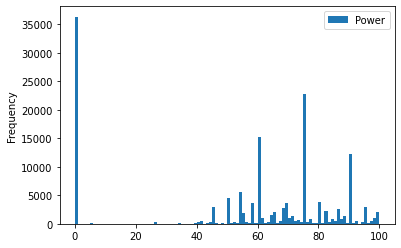

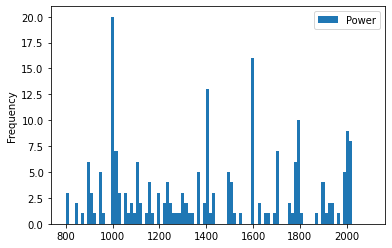

In [21]:
autos.plot(y='Power', kind='hist', bins=100, range=(0, 100))
autos.plot(y='Power', kind='hist', bins=100, range=(800, 2100))
plt.show()

В признаке "Power" имеется значительный выброс со значением 0, заменим данное значение на медианное для соответствующей модели автомобиля, наименьшую границу мощности определим 40 (согласно графика, данное значение выглядит краем основного распределения). Также заменим на медиану все значения мощности более 600, как маловероятные.

In [22]:
autos.loc[autos['Power'] < 40, 'Power'] = autos.groupby('Model')['Power'].transform('median')
autos.loc[autos['Power'] > 600, 'Power'] = autos.groupby('Model')['Power'].transform('median')

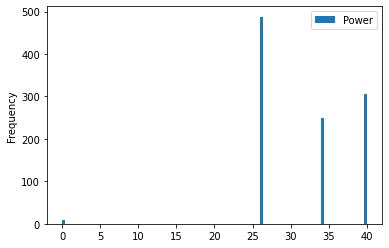

In [23]:
autos.plot(y='Power', kind='hist', bins=100, range=(0, 40))
plt.show()

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Значение мощности до 40 осталось для некоторых моделей автомобилей, так как для них медианой являются данные значения. Заменим для данных автомобилей значение мощности на медианное по всему датасету.

</div>

In [24]:
autos.loc[autos['Power'] < 40, 'Power'] = autos['Power'].median()

In [25]:
autos['Power'] = autos['Power'].astype('int')

#### Признак Kilometer.
Пробег (км)

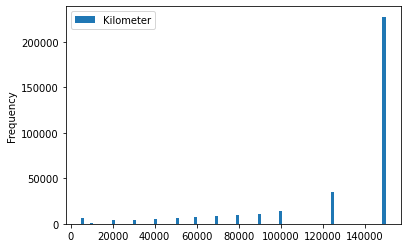

In [26]:
autos.plot(y='Kilometer', kind='hist', bins=100)
plt.show()

Распределение выглядит адекватно, признак не нуждается в обработке.

#### Признак RegistrationMonth.
Месяц регистрации автомобиля

In [27]:
print('Уникальные значения признака RegistrationMonth:', autos['RegistrationMonth'].sort_values().unique())

Уникальные значения признака RegistrationMonth: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [28]:
print('Доля значений 0 в признаке RegistrationMonth:', (autos['RegistrationMonth'] == 0).sum()/autos.shape[0])

Доля значений 0 в признаке RegistrationMonth: 0.09872002873825515


Доля значений 0 в признаке составляет 10%, это большое количество удалять их не стоит. Так как признак месяца регистрации является порядковым, то оставить значение 0 будет ошибкой, но сложно предположить на какое значение их стоит заменить. Думаю самое разумное предложение, это сезонность выбора модели автомобилей.

In [29]:
autos.loc[autos['RegistrationMonth'] == 0, 'RegistrationMonth'] = autos.groupby('Model')['RegistrationMonth'].transform(mode)

In [30]:
print('Доля значений 0 в признаке RegistrationMonth:', (autos['RegistrationMonth'] == 0).sum()/autos.shape[0])

Доля значений 0 в признаке RegistrationMonth: 0.0606447851550423


Доля значений 0 снизилась на 2,5%, это значит, что для некоторых моделей автомобилей модой является 0. В таком случае заполним оставшиеся нулевыми значения модой по всем автомобилям.

In [31]:
autos.loc[autos['RegistrationMonth'] == 0, 'RegistrationMonth'] = autos['RegistrationMonth'].mode()[0]

In [32]:
print('Доля значений 0 в признаке RegistrationMonth:', (autos['RegistrationMonth'] == 0).sum()/autos.shape[0])

Доля значений 0 в признаке RegistrationMonth: 0.0


#### Признак FuelType.
Тип топлива.

In [33]:
print('Доля пропусков в признаке FuelType:', autos['FuelType'].isna().sum()/autos.shape[0])
print('Уникальные значения признака FuelType:', autos['FuelType'].sort_values().unique())

Доля пропусков в признаке FuelType: 0.07998127302225742
Уникальные значения признака FuelType: ['cng' 'electric' 'gasoline' 'hybrid' 'lpg' 'other' 'petrol' nan]


Пропуски в типе топлива заполним модой по моделям.

In [34]:
autos['FuelType'] = autos['FuelType'].fillna(autos.groupby('Model')['FuelType'].transform(mode))

In [35]:
print('Доля пропусков в признаке FuelType:', autos['FuelType'].isna().sum()/autos.shape[0])
print('Уникальные значения признака FuelType:', autos['FuelType'].sort_values().unique())

Доля пропусков в признаке FuelType: 0.0
Уникальные значения признака FuelType: ['cng' 'electric' 'gasoline' 'hybrid' 'lpg' 'other' 'petrol']


#### Признак NotRepaired.
Была машина в ремонте или нет.

In [36]:
print('Доля пропусков в признаке NotRepaired:', autos['NotRepaired'].isna().sum()/autos.shape[0])
print('Уникальные значения признака NotRepaired:', autos['NotRepaired'].sort_values().unique())

Доля пропусков в признаке NotRepaired: 0.1904704417034483
Уникальные значения признака NotRepaired: ['no' 'yes' nan]


Пропуски в признаке ремонта заполним модой по модели и годом регистрации.

In [37]:
autos['NotRepaired'] = autos['NotRepaired'].fillna(autos.groupby(['Model', 'RegistrationYear'])['NotRepaired'].transform(mode))

In [38]:
print('Доля пропусков в признаке NotRepaired:', autos['NotRepaired'].isna().sum()/autos.shape[0])
print('Уникальные значения признака NotRepaired:', autos['NotRepaired'].sort_values().unique())

Доля пропусков в признаке NotRepaired: 0.021294575948789373
Уникальные значения признака NotRepaired: ['no' 'yes' nan]


Доля пропусков снизилась до 2,9%, это значит, что для некоторых моделей и годов выпуска модой является NaN. В таком случае заполним оставшиеся пропуски значения модой сначала по году регистрации, а после оставшиеся по модели.

In [39]:
autos['NotRepaired'] = autos['NotRepaired'].fillna(autos.groupby('RegistrationYear')['NotRepaired'].transform(mode))
autos['NotRepaired'] = autos['NotRepaired'].fillna(autos.groupby('Model')['NotRepaired'].transform(mode))

In [40]:
print('Доля пропусков в признаке NotRepaired:', autos['NotRepaired'].isna().sum()/autos.shape[0])
print('Уникальные значения признака NotRepaired:', autos['NotRepaired'].sort_values().unique())

Доля пропусков в признаке NotRepaired: 0.0
Уникальные значения признака NotRepaired: ['no' 'yes']


#### Признак NumberOfPictures.
Количество фотографий автомобиля.

In [41]:
print('Доля пропусков в признаке NumberOfPictures:', autos['NumberOfPictures'].isna().sum()/autos.shape[0])
print('Уникальные значения признака NumberOfPictures:', autos['NumberOfPictures'].sort_values().unique())

Доля пропусков в признаке NumberOfPictures: 0.0
Уникальные значения признака NumberOfPictures: [0]


Признак не несёт какой либо качественной информации, для всех автомобилей значение признака 0. Удалим его.

In [42]:
autos = autos.drop(['NumberOfPictures'], axis=1)

#### Признаки LastSeen_year, DateCreated_year.
Год последней активности пользователя, год создания анкеты.

In [43]:
print('Доля пропусков в признаке LastSeen_year:', autos['LastSeen_year'].isna().sum()/autos.shape[0])
print('Уникальные значения признака LastSeen_year:', autos['LastSeen_year'].sort_values().unique())
print('Доля пропусков в признаке DateCreated_year:', autos['DateCreated_year'].isna().sum()/autos.shape[0])
print('Уникальные значения признака DateCreated_year:', autos['DateCreated_year'].sort_values().unique())

Доля пропусков в признаке LastSeen_year: 0.0
Уникальные значения признака LastSeen_year: [2016]
Доля пропусков в признаке DateCreated_year: 0.0
Уникальные значения признака DateCreated_year: [2014 2015 2016]


In [44]:
autos = autos.drop(['LastSeen_year'], axis=1)
autos = autos.drop(['DateCreated_year'], axis=1)

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Признаки не несут какой либо качественной информации, доля уникальных значений в них крайне низка. Удалим их.

</div>

#### Признак PostalCode.
Почтовый индекс владельца анкеты (пользователя).

In [45]:
print('Доля пропусков в признаке PostalCode:', autos['PostalCode'].isna().sum()/autos.shape[0])
print('Уникальные значения признака PostalCode:', autos['PostalCode'].sort_values().unique())

Доля пропусков в признаке PostalCode: 0.0
Уникальные значения признака PostalCode: [ 1067  1068  1069 ... 99994 99996 99998]


Значения выглядят адекватно, признак не нуждается в обработке.

#### Признак Price.
Цена.

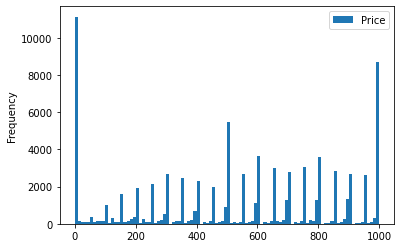

In [46]:
autos.plot(y='Price', kind='hist', bins=100, range=(0, 1000))
plt.show()

Наблюдается большой выброс в районе 0, заменим цену менее 100 Евро на медианную, для соответствующей модели.

In [47]:
autos.loc[autos['Price'] < 100, 'Price'] = autos.groupby('Model')['Price'].transform('median')
autos['Price'] = autos['Price'].astype('int')

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Добавил  предобработку признака 'Price'

</div>

#### Вывод по предобработке данных.

In [48]:
print('Доля объектов потеряных в процессе предобработки данных:', 
      (autos_count-autos.shape[0])/autos_count)

Доля объектов потеряных в процессе предобработки данных: 0.041628923523220146


Проведена предобработка данных, устранены пропуски и аномалии, выделены дополнительные признаки из дат. В ходе предобработки потеряно менее 0,1 % данных, что не должно повлиять на качество исследования.

In [49]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339617 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              339617 non-null  int64 
 1   VehicleType        339617 non-null  object
 2   RegistrationYear   339617 non-null  int64 
 3   Gearbox            339617 non-null  object
 4   Power              339617 non-null  int64 
 5   Model              339617 non-null  object
 6   Kilometer          339617 non-null  int64 
 7   RegistrationMonth  339617 non-null  int64 
 8   FuelType           339617 non-null  object
 9   Brand              339617 non-null  object
 10  NotRepaired        339617 non-null  object
 11  PostalCode         339617 non-null  int64 
 12  DateCreated_month  339617 non-null  int64 
 13  DateCreated_day    339617 non-null  int64 
 14  LastSeen_month     339617 non-null  int64 
 15  LastSeen_day       339617 non-null  int64 
dtypes: int64(10), object

In [50]:
#КОД РЕВЬЮЕРА

display(autos.isna().mean())
autos.describe()

Price                0.0
VehicleType          0.0
RegistrationYear     0.0
Gearbox              0.0
Power                0.0
Model                0.0
Kilometer            0.0
RegistrationMonth    0.0
FuelType             0.0
Brand                0.0
NotRepaired          0.0
PostalCode           0.0
DateCreated_month    0.0
DateCreated_day      0.0
LastSeen_month       0.0
LastSeen_day         0.0
dtype: float64

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,PostalCode,DateCreated_month,DateCreated_day,LastSeen_month,LastSeen_day
count,339617.000000,339617.000000,339617.000000,339617.000000,339617.000000,339617.000000,339617.000000,339617.000000,339617.000000,339617.000000
mean,4573.539823,2002.521058,118.866514,128120.471001,6.116137,50607.681179,3.160207,15.851015,3.567522,11.928399
std,4491.929396,6.853117,52.543714,37846.593874,3.328413,25805.465922,0.376504,9.123569,0.495421,8.872815
min,100.000000,1940.000000,40.000000,5000.000000,1.000000,1067.000000,1.000000,1.000000,3.000000,1.000000
25%,1250.000000,1999.000000,75.000000,125000.000000,3.000000,30169.000000,3.000000,8.000000,3.000000,6.000000
50%,2900.000000,2003.000000,109.000000,150000.000000,6.000000,49492.000000,3.000000,16.000000,4.000000,7.000000
75%,6500.000000,2007.000000,143.000000,150000.000000,9.000000,71229.000000,3.000000,24.000000,4.000000,19.000000
max,20000.000000,2016.000000,600.000000,150000.000000,12.000000,99998.000000,12.000000,31.000000,4.000000,31.000000



<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Ошибка ❌</b>
       
В данных осталось много аномалий, давай поработем с ними еще)  
    
1. Минимальная цена (надо определить минимальную границу цены, но так, чтобы не срезать бюджетный сегмент автомобилей)  
    
2. Максимальный год  
    
3. Минимальная мощность  
    
4. Присутствуют лишние признаки
    
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Обработка аномалий:

1. Добавил предобработку признака в блоке "Признак Price", устранил большой выброс в районе значения 0. Не стал убирать маленькие значения выше 5 Евро, их не так много. Эти значения могут быть связаны с желанием просто избавиться от старого автомобиля за символическую плату, чтобы просто приехали и забрали (не задумываться об утилизации).

2. Максимальный год исправил в блоке "Признак RegistrationYear".
    
3. Минимальная мощность исправил в блоке "Признак Power". Убрал большой выброс в значении 0, заменив медианным значение для модели. Для тех моделей где медианное значение равно 0, взял медиану по всему датасету.
    
4. Удалил признаки "LastSeen_year" и "DateCreated_year" не несущие информации, с постоянным знаяением. См. блок "Признаки LastSeen_year", "DateCreated_year".


</div>


<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Комментарий ревьюера 2 ❌</b>
       
Мощность не может быть 1лс, машина не уедет) Если ты решил не срезать данные, а восстанавливать аномалии, то брать медиану не совсем корректно по всему датасету, мы создаем новые аномалии, очень странно, когда какой-нибудь мерседес и фиат имеют одинаковую мощность) Лучше сделать через группировку или все таки срезать данные.  
    
-----    
    
Также цена не может быть такой маленькой, да есть ситуации, когда хотят избавиться от автомобиля, но наша модель создается для предсказания цены продажи автомобиля, а не избавления) По сути для нас это аномальное поведение, которое надо убирать, чтобы не мешать модели. Всегда надо отталкиваться от задачи бизнеса!
    
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента 2:</b> 
Обработка аномалий:

1. Верхним пределом для мощности сделал значение 40, определил его по графику, визуально видно, что это край основного распределения.

2. У меня мощность заполняется группировкой по модели автомобиля, остаётся небольшое количество моделей, для которых медиана ниже 40, только для этих автомобилей берётся медиана по датасету.
    
3. Верхним пределом для стоимости сделал значение 100, определил его по графику, визуально видно, что это край основного распределения.

</div>

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Комментарий ревьюера 3 ✔️</b>
       
Отличная работа!
    
</div>


## Обучение моделей

### Создание выборок

Выделим целевой признак "Price".

In [51]:
features = autos.drop('Price', axis=1)
target = autos['Price']

Проведём кодирование категориальных данных методом One-Hot-Encoding.
Признаки требующие кодирования:
- VehicleType,
- Gearbox,
- Model,
- FuelType,
- Brand,
- NotRepaired.

In [52]:
# features_ohe = pd.get_dummies(
#     features, columns=['VehicleType','RegistrationYear','Gearbox','Model',
#                        'RegistrationMonth','FuelType','Brand','NotRepaired',
#                        'PostalCode','DateCreated_year','DateCreated_month',
#                        'DateCreated_day','LastSeen_year','LastSeen_month',
#                        'LastSeen_day'], drop_first=True)

features_ohe = pd.get_dummies(
    features, columns=['VehicleType','Gearbox','Model',
                       'FuelType','Brand','NotRepaired'], drop_first=True)

Разделим данные на обучающую и тестовую выборки в соотношении 80:20.

In [53]:
features_ohe_train, features_ohe_test, target_train, target_test = train_test_split(
    features_ohe, target, train_size=0.8, random_state=RANDOM)

Выделим из обучающей выборки валидационную (20%), для подбора гиперпараметров.

In [54]:
features_ohe_train, features_ohe_valid, target_train, target_valid = train_test_split(
    features_ohe_train, target_train, train_size=0.8, random_state=RANDOM)

In [55]:
del autos, features, target, features_ohe

### Линейные модели

Для линейной регрессии проведём стандартизацию данных. Убрал стандартизацию, так как не хватало оперативной памяти при обучении моделей.

In [56]:
# scaler = StandardScaler()
# scaler.fit(features_ohe_train)
# features_ohe_train_scaled = scaler.transform(features_ohe_train)
# features_ohe_valid_scaled = scaler.transform(features_ohe_valid)
# features_ohe_test_scaled = scaler.transform(features_ohe_test)

#### Модель линейной регрессии c L1-регуляризацией (Lasso)

In [57]:
%%time

best_lasso_model = None
best_score_rmse = 20000  # 20000 заведомо выше оценки

for i_tol in range(80, 100,20):
    for i_alpha in tqdm(range(30, 80, 20)):
        lasso_model = Lasso(alpha=i_alpha*0.01, tol=i_tol*0.001, random_state=RANDOM)
        lasso_model.fit(features_ohe_train, target_train)
        score_rmse = mean_squared_error(target_valid, lasso_model.predict(features_ohe_valid)) ** 0.5
        if score_rmse < best_score_rmse:
            best_lasso_model = lasso_model
            best_score_rmse = score_rmse
        
print(f'\nЛучшая модель линейной регрессии L1: {best_lasso_model}\n'
      f'Значение RMSE полученное на валидации для лучшей линейной регрессии L1 : {best_score_rmse}')

100%|██████████| 3/3 [07:56<00:00, 158.70s/it]


Лучшая модель линейной регрессии L1: Lasso(alpha=0.3, random_state=1111, tol=0.08)
Значение RMSE полученное на валидации для лучшей линейной регрессии L1 : 2632.912015902568
CPU times: user 5min 23s, sys: 2min 31s, total: 7min 54s
Wall time: 7min 56s


#### Модель линейной регрессии c L2-регуляризацией (Ridge)

In [58]:
%%time

best_ridge_model = None
best_score_rmse = 20000  # 20000 заведомо выше оценки

for i_tol in range(1, 100,20):
    for i_alpha in tqdm(range(60, 160, 20)):
        ridge_model = Ridge(alpha=i_alpha*0.01, tol=i_tol*0.00001, random_state=RANDOM)
        ridge_model.fit(features_ohe_train, target_train)
        score_rmse = mean_squared_error(target_valid, ridge_model.predict(features_ohe_valid)) ** 0.5
        if score_rmse < best_score_rmse:
            best_ridge_model = ridge_model
            best_score_rmse = score_rmse
        
print(f'\nЛучшая модель линейной регрессии L2: {best_ridge_model}\n'
      f'Значение RMSE полученное на валидации для лучшей линейной регрессии L2: {best_score_rmse}')

100%|██████████| 5/5 [00:15<00:00,  3.04s/it]


Лучшая модель линейной регрессии L2: Ridge(alpha=0.6, random_state=1111, tol=1e-05)
Значение RMSE полученное на валидации для лучшей линейной регрессии L2: 2627.3796023404307
CPU times: user 48.5 s, sys: 27.6 s, total: 1min 16s
Wall time: 1min 16s


### Случайный лес

In [59]:
%%time

best_forest_model = None
best_score_rmse = 20000  # 20000 заведомо выше оценки

for depth in tqdm(range(21, 30, 3)):
    forest_model = RandomForestRegressor(max_depth = depth, n_estimators=100, random_state=RANDOM)
    forest_model.fit(features_ohe_train, target_train)
    score_rmse = mean_squared_error(target_valid, forest_model.predict(features_ohe_valid)) ** 0.5
    if score_rmse < best_score_rmse:
        best_forest_model = forest_model
        best_score_rmse = score_rmse
        
print(f'\nЛучшая модель случайного леса: {best_forest_model}\n'
      f'Значение RMSE полученное на валидации для лучшего случайного леса: {best_score_rmse}')

100%|██████████| 3/3 [25:32<00:00, 510.89s/it]


Лучшая модель случайного леса: RandomForestRegressor(max_depth=27, random_state=1111)
Значение RMSE полученное на валидации для лучшего случайного леса: 1624.153373228998
CPU times: user 25min 26s, sys: 5.38 s, total: 25min 32s
Wall time: 25min 32s


### Градиентный бустинг LightGBM

In [60]:
%%time

best_lgbm_model = None
best_score_rmse = 20000  # 20000 заведомо выше оценки

for iterations in range(600, 800, 100):
    for data_in_leaf in range(300, 800, 200):
        for depth in tqdm(range(11, 16, 3)):
            lgbm_model = LGBMRegressor(num_iterations=iterations, max_depth=depth, num_leaves=2**depth, min_data_in_leaf=data_in_leaf, random_state=RANDOM)
            lgbm_model.fit(features_ohe_train, target_train)
            score_rmse = mean_squared_error(target_valid, lgbm_model.predict(features_ohe_valid)) ** 0.5
            if score_rmse < best_score_rmse:
                best_lgbm_model = lgbm_model
                best_score_rmse = score_rmse
        
print(f'\nЛучшая модель градиентного бустинга: {best_lgbm_model}\n'
      f'Значение RMSE полученное на валидации для лучшего градиентного бустинга: {best_score_rmse}')

  0%|          | 0/2 [00:00<?, ?it/s]/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300


 50%|█████     | 1/2 [00:47<00:47, 47.66s/it]/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300


  0%|          | 0/2 [00:00<?, ?it/s]/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500


 50%|█████     | 1/2 [00:46<00:46, 46.61s/it]/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500


  0%|          | 0/2 [00:00<?, ?it/s]/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=700


 50%|█████     | 1/2 [00:46<00:46, 46.33s/it]/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=700


  0%|          | 0/2 [00:00<?, ?it/s]/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300


 50%|█████     | 1/2 [00:56<00:56, 57.00s/it]/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300


  0%|          | 0/2 [00:00<?, ?it/s]/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500


 50%|█████     | 1/2 [00:53<00:53, 53.52s/it]/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500


  0%|          | 0/2 [00:00<?, ?it/s]/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=700


 50%|█████     | 1/2 [00:53<00:53, 53.38s/it]/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=700


100%|██████████| 2/2 [02:02<00:00, 61.36s/it]


Лучшая модель градиентного бустинга: LGBMRegressor(max_depth=14, min_data_in_leaf=300, num_iterations=700,
              num_leaves=16384, random_state=1111)
Значение RMSE полученное на валидации для лучшего градиентного бустинга: 1608.745161064391
CPU times: user 12min 7s, sys: 641 ms, total: 12min 8s
Wall time: 12min 14s



<div class="alert alert-block alert-warning"; style="border-left: 6px solid orange">
<b>Рекомендация ⚠️</b>
       
Молодец, что сам написал подбор гиперпараметров для моделей, но рекомендую познакомиться с оптимизаторами, это удобнее и быстрее)  
    
Ссылка: https://habr.com/ru/company/antiplagiat/blog/528384/
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
    
Спасибо за статью, обязательно с ней ознакомлюсь. Я решил писать свой подбор гиперпараметров по причине того, что я виже через tqdm процесс, также из опыта применения GridSearch и RandomSearch из sklearn на прошлых проектах, они не давали преимущества в скорости.

Но у тебя в ссылке другие модули, я поразбираюсь с ними.
</div>


<div class="alert alert-block alert-warning"; style="border-left: 6px solid orange">
<b>Рекомендация ⚠️</b>
       
LGBM умеет работать с категориальными признаками и лучше для него не кодировать данные предварительно. Чтобы LGBM понял где в данных категориальные признаки, надо их тип данных изменить на category
    
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Решил передать в LGBM уже закодированные признаки по причине готовых выборок. Чтобы LGBM не повторял уже сделанную работу.
</div>

## Анализ моделей

Анализ лучших моделей проведём по следующим правилам:
1) переобучим каждую лучшую модель на объединённой выборке (обучающей и тестовой),

2) проверим качество моделей на тестовой выборке,

3) на каждом этапе произведём замер времени,

4) сохраним результаты в таблице.

### Объединение обучающей и валидационной выборок

In [61]:
features_ohe_train = pd.concat([features_ohe_train, features_ohe_valid])
target_train = pd.concat([target_train, target_valid])

In [62]:
del features_ohe_valid, target_valid

### Функция анализа модели.

In [63]:
def model_test(model):
    
    time_fit_start = time()
    model.fit(features_ohe_train, target_train)
    time_fit = time()-time_fit_start
    
    time_predict_start = time()
    predict = model.predict(features_ohe_test)
    time_predict = time()-time_predict_start
    
    return time_fit, time_predict, mean_squared_error(target_test, predict) ** 0.5
        

In [64]:
result_models_test = pd.DataFrame(columns=['model','time_fit','time_predict','rmse'])

for best_model in [best_lasso_model, best_ridge_model, best_forest_model, best_lgbm_model]:
    time_fit,time_predict,rmse = model_test(best_model)
    result_model = {'model':best_model,'time_fit':time_fit,'time_predict':time_predict,'rmse':rmse}
    result_models_test = result_models_test.append(result_model, ignore_index=True)

/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300


Результат анализа моделей представлен в таблице:
- model - модель с параметрами,
- time_fit - время обучения (сек.),
- time_predict - время предсказания на тестовой выборке (сек.),
- rmse - качество на тестовой выборке.

In [65]:
display(result_models_test)

,model,time_fit,time_predict,rmse
0,"Lasso(alpha=0.3, random_state=1111, tol=0.08)",171.840585,0.293974,2637.060382
1,"Ridge(alpha=0.6, random_state=1111, tol=1e-05)",3.398006,0.295954,2630.781867
2,"(DecisionTreeRegressor(max_depth=27, max_featu...",675.476325,3.437782,1576.294124
3,"LGBMRegressor(max_depth=14, min_data_in_leaf=3...",83.893693,13.816623,1573.057908


<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Успех ✔️</b>
       
Классная финальная табличка, очень удобно сравнивать модельки)
    
</div>


## Вывод.
Однозначно лучшую модель выделить нельзя, лучшие скорость обучения, предсказания и качества оказались у разных моделей. 
1) Лучшее качесвто на RMSE показала модель градиентного бустинга 1573,

2) Лучшее время обучения показала модель линейной регрессии с L2-регуляризацией 3,4 сек.,

3) Лучшее время предсказания показала модель линейной регрессии с L1-регуляризацией 0.3 сек.


<div class="alert alert-block alert-warning"; style="border-left: 6px solid orange">
<b>Итоговый комментарий ревьюера ⚠️</b>
       
Хороший проект, спасибо, что соблюдал структуру, было приятно проверять! В работе остались некоторые ошибки, их я отметил по ходу работы, давай поправим) Жду проект на повторную проверку и всегда рад вопросам!)
    
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
    
Спасибо за ревью!
    
Внёс правки, самая существенная выброс по "Price" в нуле. После правок качесвто LGBM значительно поднялось, с 1663 до 1554, также выросло качество на случайном лесе.
</div>


<div class="alert alert-block alert-warning"; style="border-left: 6px solid orange">
<b>Итоговый комментарий ревьюера 2 ⚠️</b>
       
Спасибо за внесенные корректировки, выходим на финишную прямую! Осталось немного доработать с аномалиями, я думаю у тебя быстро получится это сделать) Буду ждать твой проект!
    
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента 2:</b> 
    
Спасибо за ревью!
    
Внёс правки. Ограничил диапазон подбора гиперпараметров, очень медленно происходит процес обучения, надеюсь это не будет критично. Я сейчас в дороге и у меня нет стабильного интернета (часто зависало ядро).
</div>

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Итоговый комментарий ревьюера 3 ✔️</b>
       
Теперь все классно, можем двигаться дальше) Счастливого пути на дорогах и успехов в дальнейшем обучении!)
    
</div>


## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнена загрузка и подготовка данных
- [ ]  Выполнено обучение моделей
- [ ]  Есть анализ скорости работы и качества моделей